## Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Loading the Dataset

In [2]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [3]:
print("The shape of X_train: ", X_train.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of X_test: ", X_test.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X_train:  (455, 30)
The shape of y_train:  (455,)
The shape of X_test:  (114, 30)
The shape of y_test:  (114,)


## Defining Helper Functions

In [4]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [5]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

In [6]:
def log_loss(y_true, y_pred):
    epsilon = 1e-15  
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

## Logistic Regression Class

In [7]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            reg_prediction = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(reg_prediction)

            loss = log_loss(y, predictions)
            self.loss_history.append(loss)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
            
    def predict(self, X):
        reg_prediction = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(reg_prediction)
        y_pred = [0 if y<=0.5 else 1 for y in predictions]
        return y_pred

## Training the Model


In [8]:
clr = LogisticRegression(lr = 0.0001)
clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)

In [9]:
acc = accuracy(y_pred, y_test)
print(acc)

0.9298245614035088


In [10]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[39  6]
 [ 2 67]]


## Plotting the Loss Curve

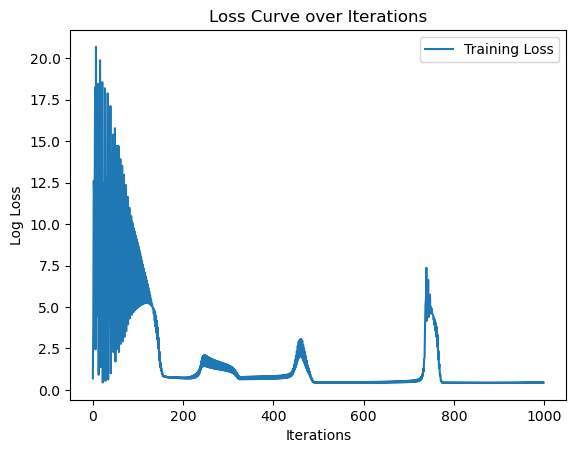

In [11]:
plt.plot(clr.loss_history, label='Training Loss')
plt.title('Loss Curve over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

## Visualizing the Confusion Matrix

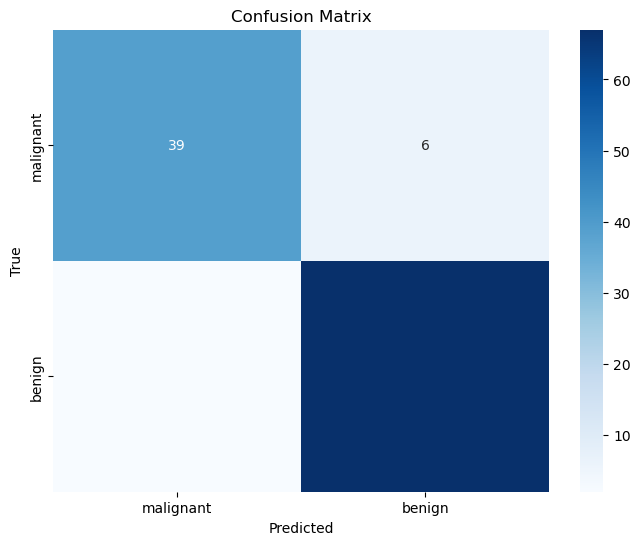

In [12]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=bc.target_names, yticklabels=bc.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()